### Visualizing of Experiment Results as a Bar Plot

At the end of each experiment, a `results.csv` file is generated, containing the average accuracy metrics across all runs of the experiment.

The `plot_accuracies`-function displays the worst, best, and average accuracy for each single domain as a bar plot. Additionally, the metrics across all domains are displayed by the dotted line.

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs//plots\accuracy_across_domains.png


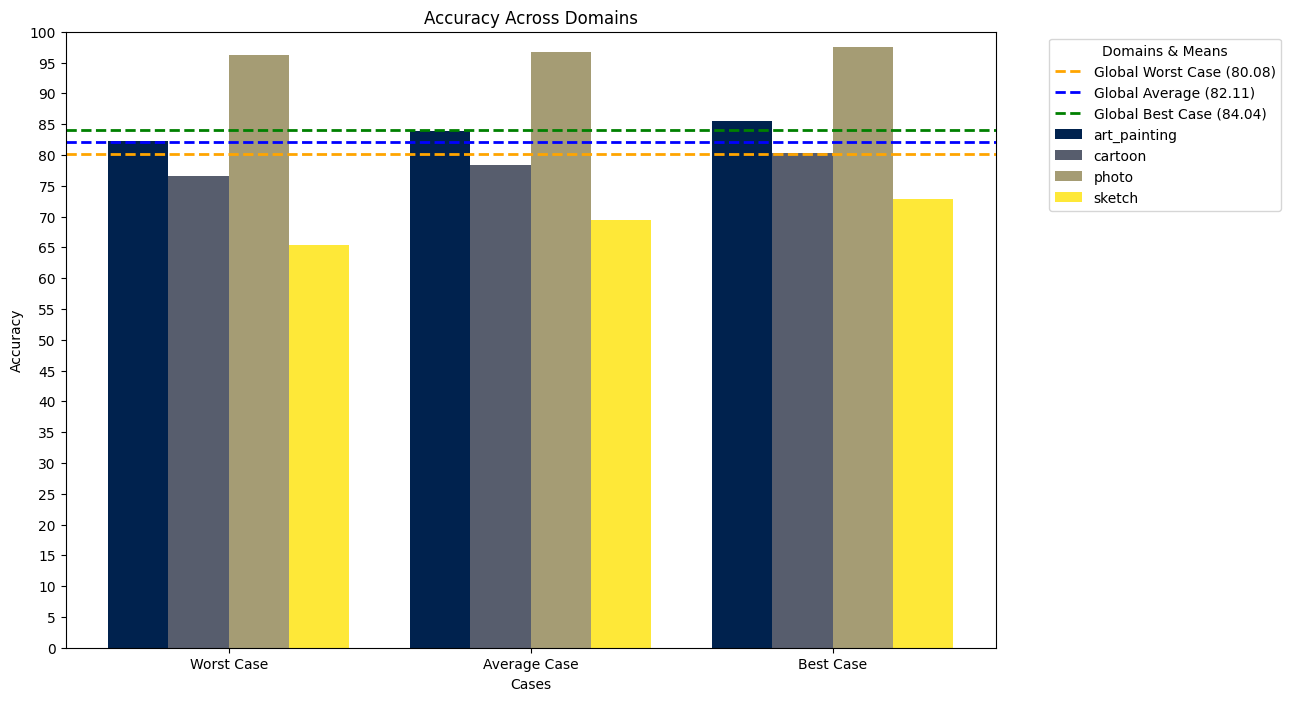

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/art_painting_train_loss_plot.png


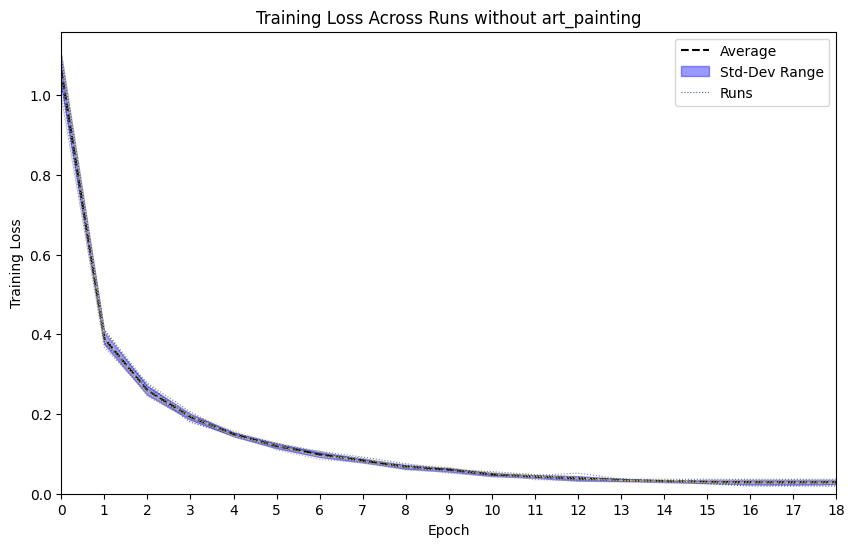

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/cartoon_train_loss_plot.png


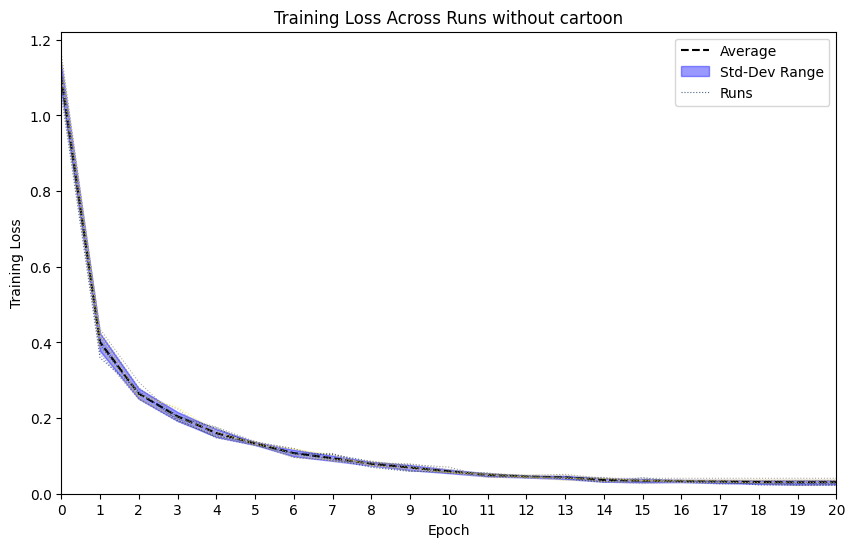

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/photo_train_loss_plot.png


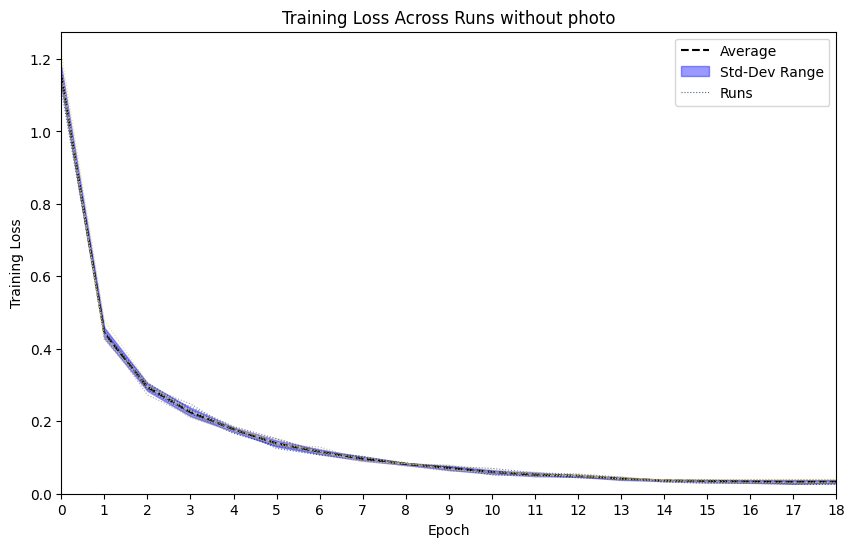

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/sketch_train_loss_plot.png


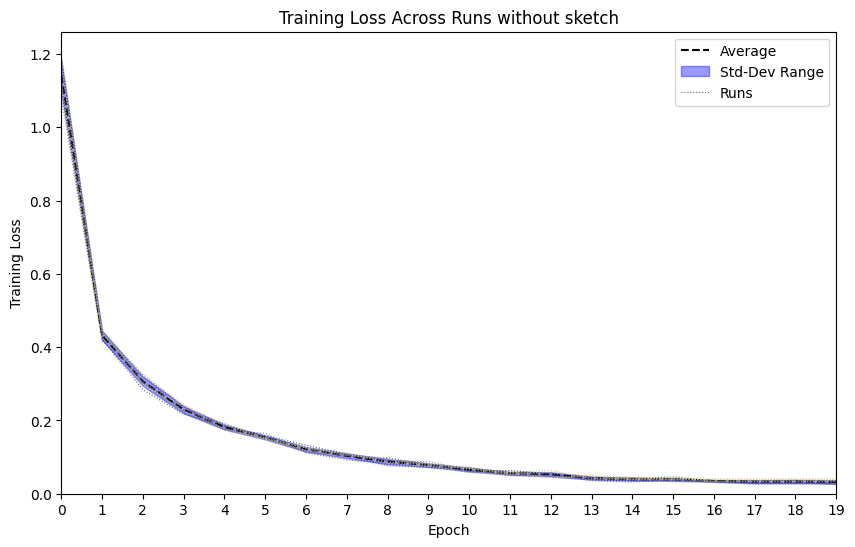

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs//plots\global_train_loss_plot.png


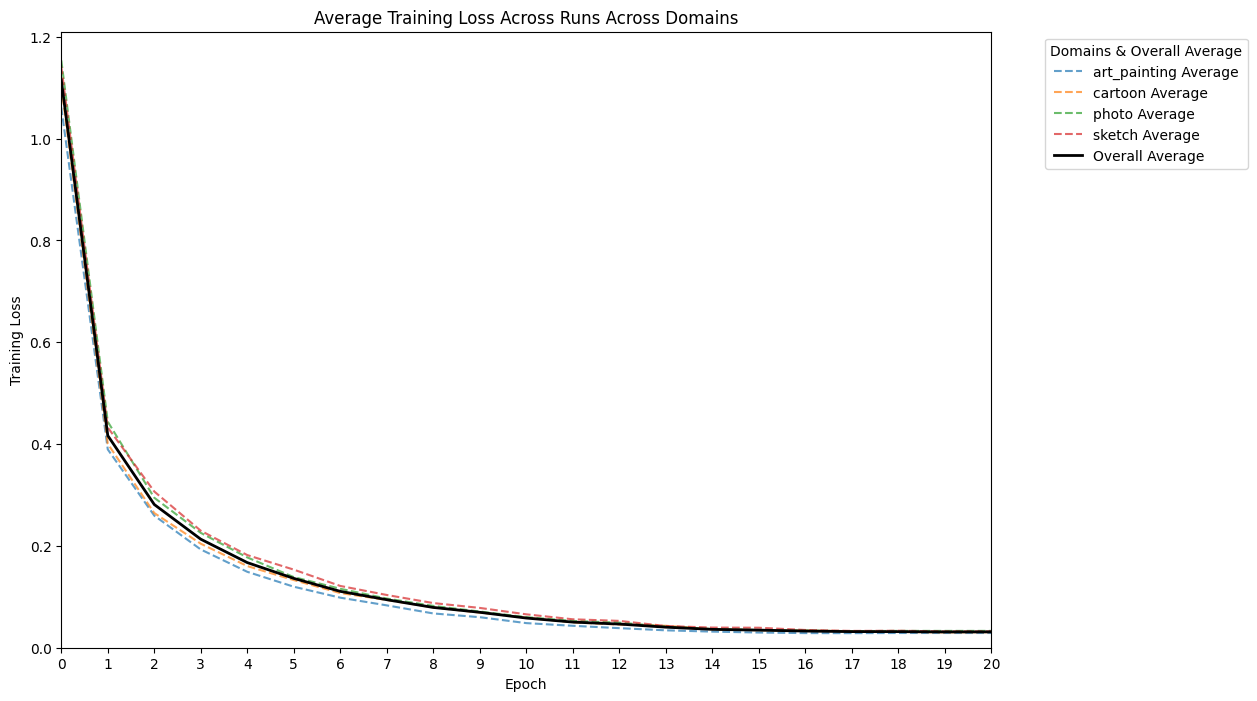

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/art_painting_val_loss_plot.png


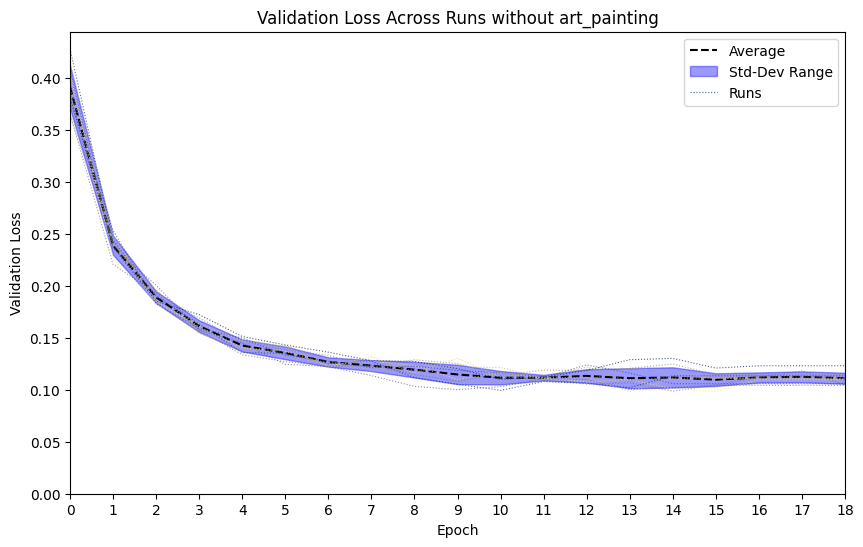

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/cartoon_val_loss_plot.png


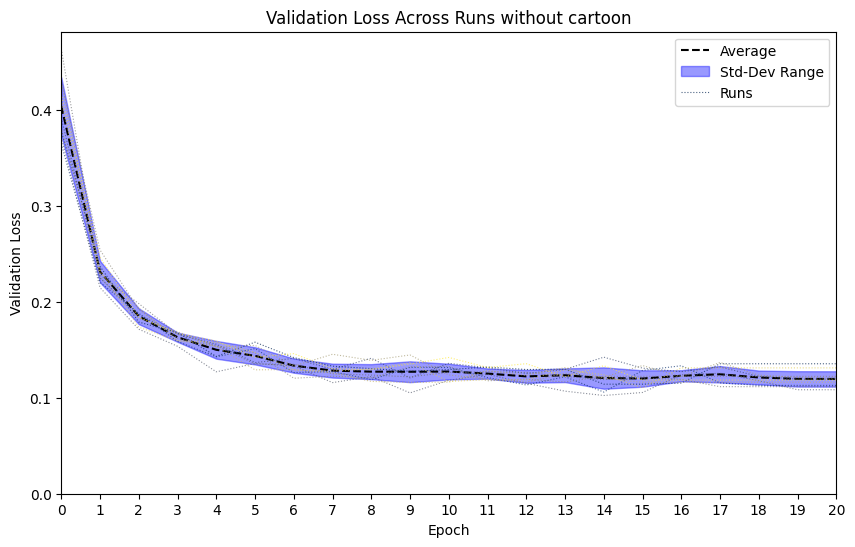

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/photo_val_loss_plot.png


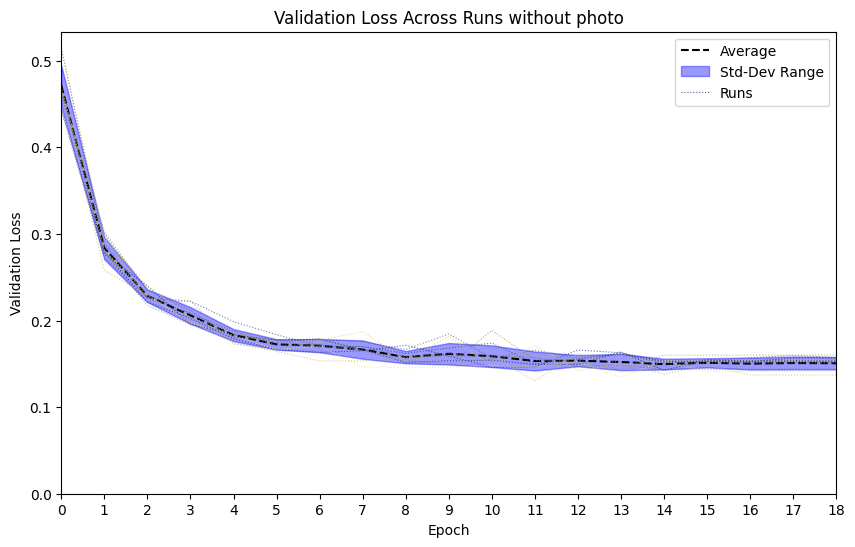

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/sketch_val_loss_plot.png


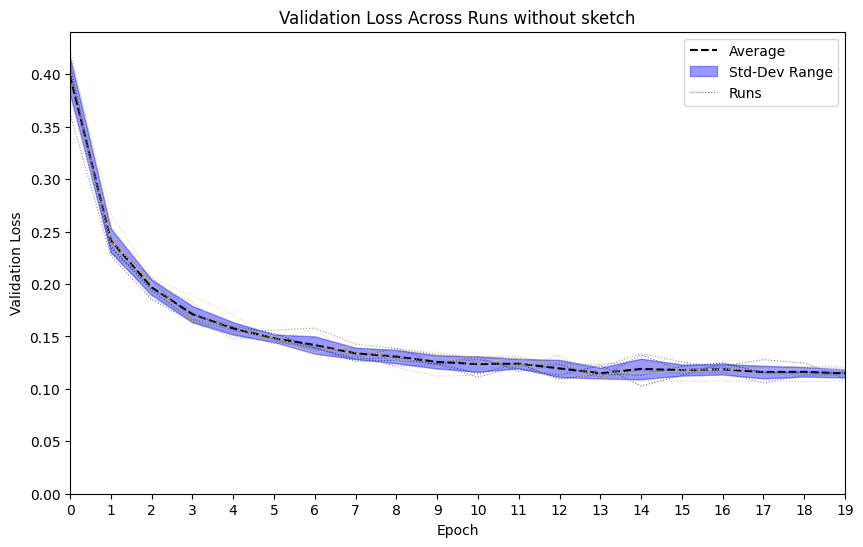

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs//plots\global_val_loss_plot.png


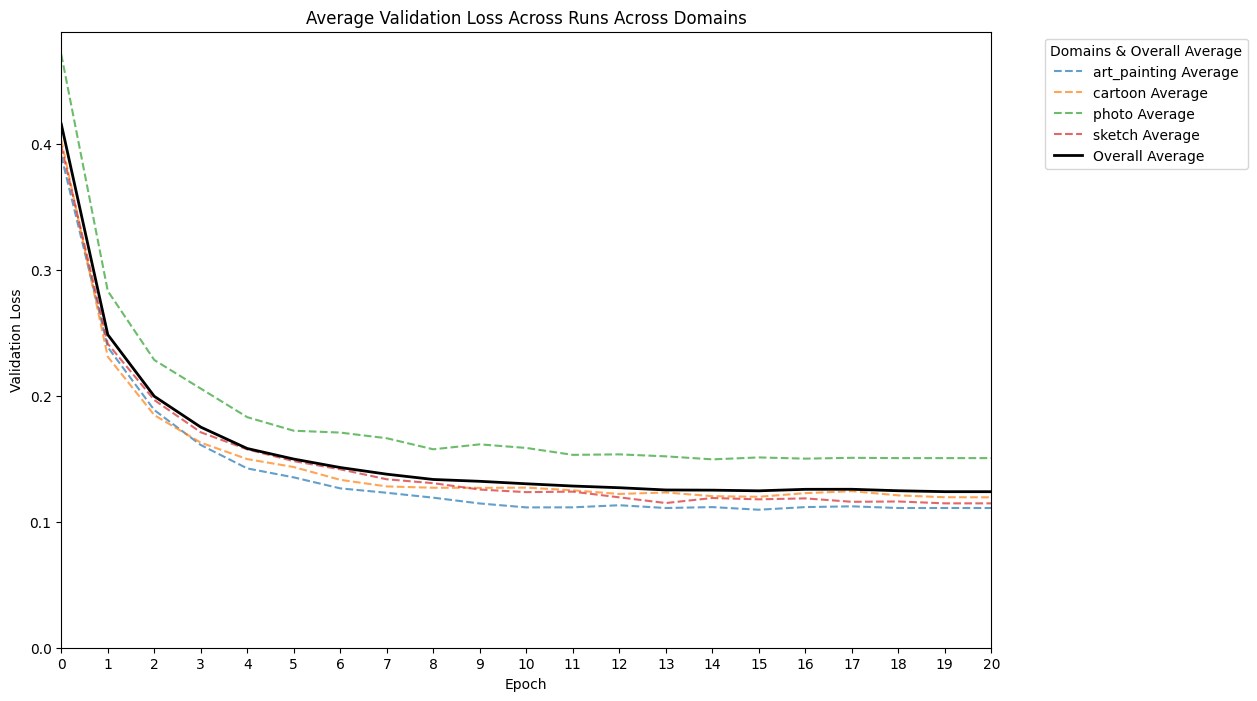

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/art_painting_train_accuracy_plot.png


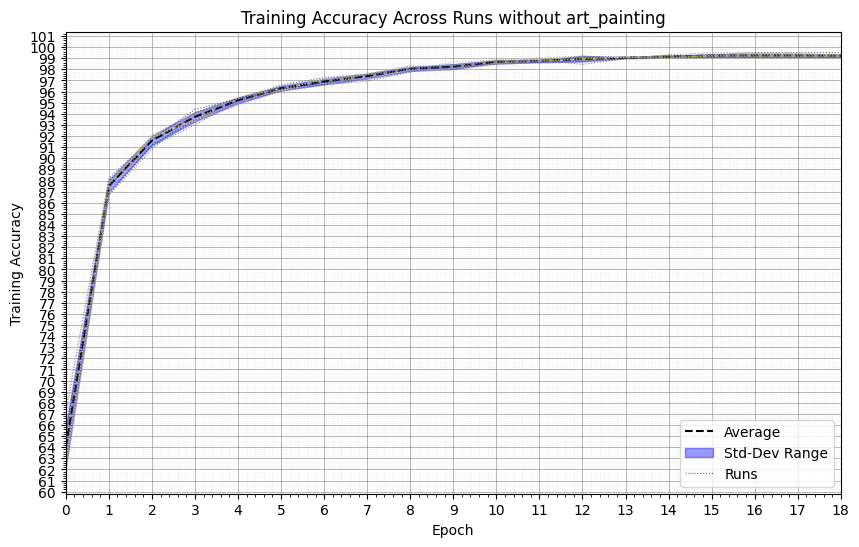

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/cartoon_train_accuracy_plot.png


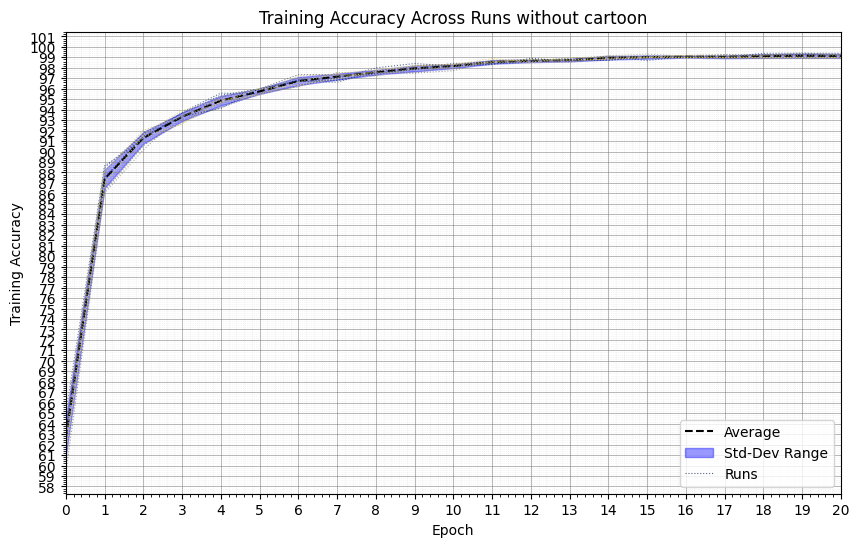

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/photo_train_accuracy_plot.png


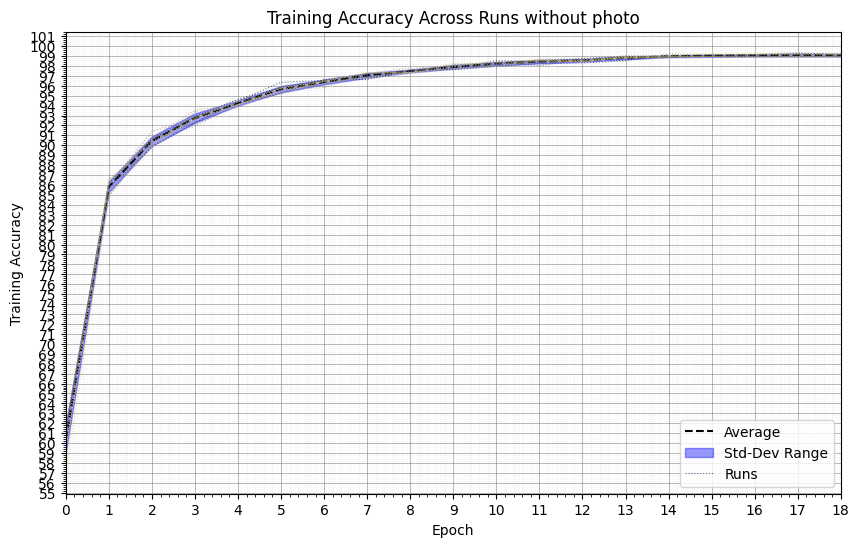

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/sketch_train_accuracy_plot.png


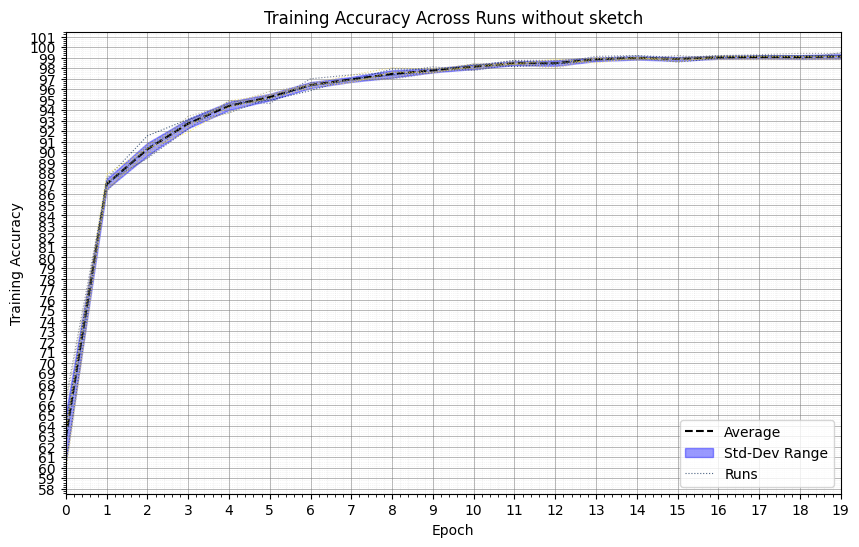

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs//plots\global_train_accuracy_plot.png


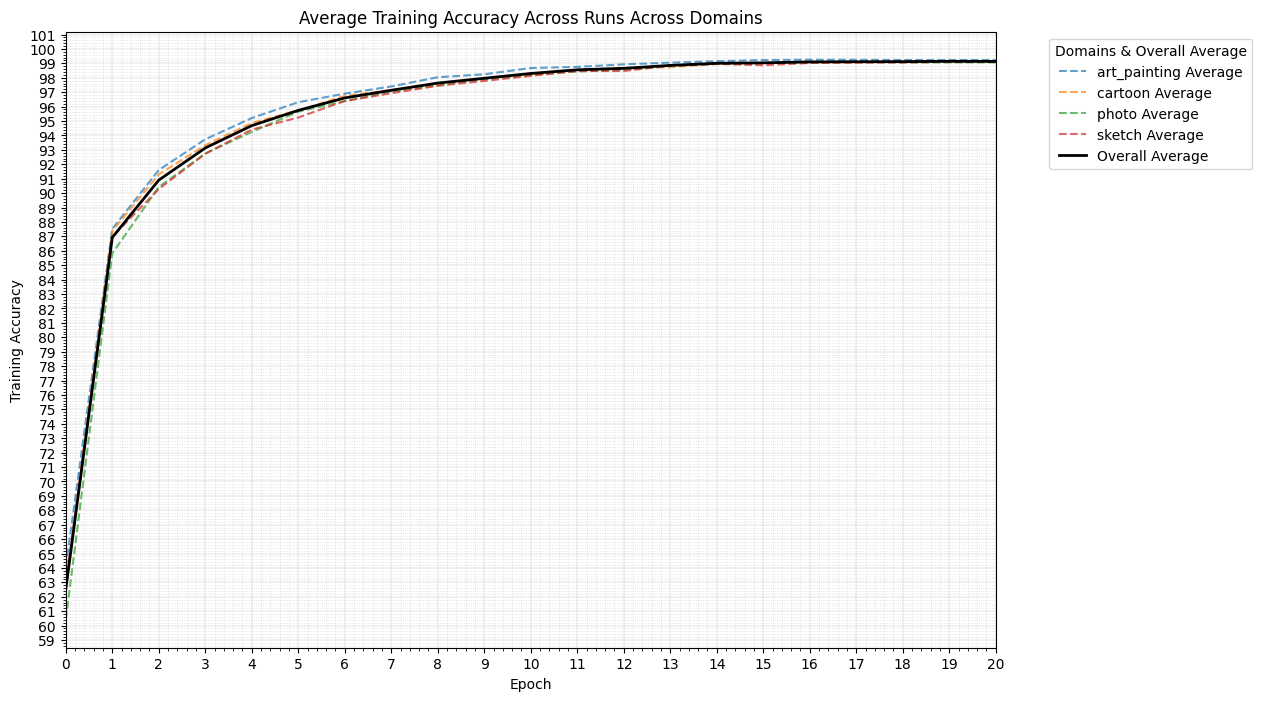

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/art_painting_val_accuracy_plot.png


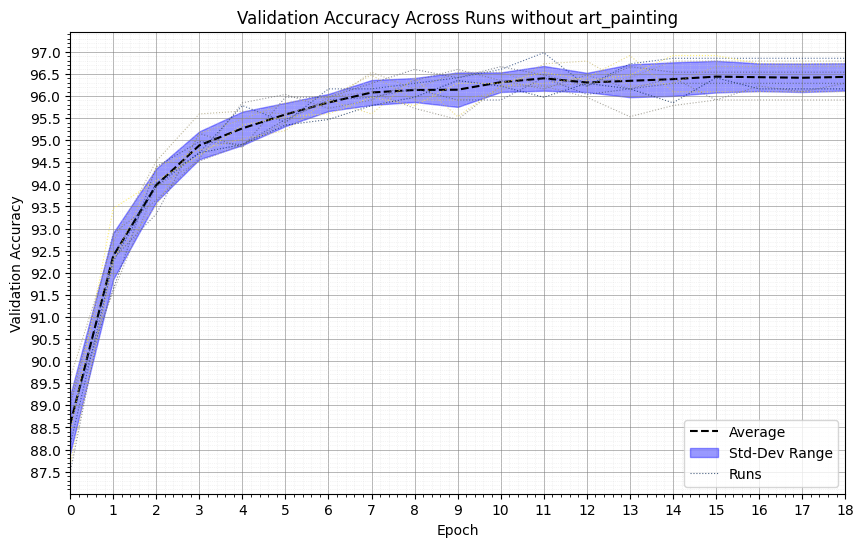

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/cartoon_val_accuracy_plot.png


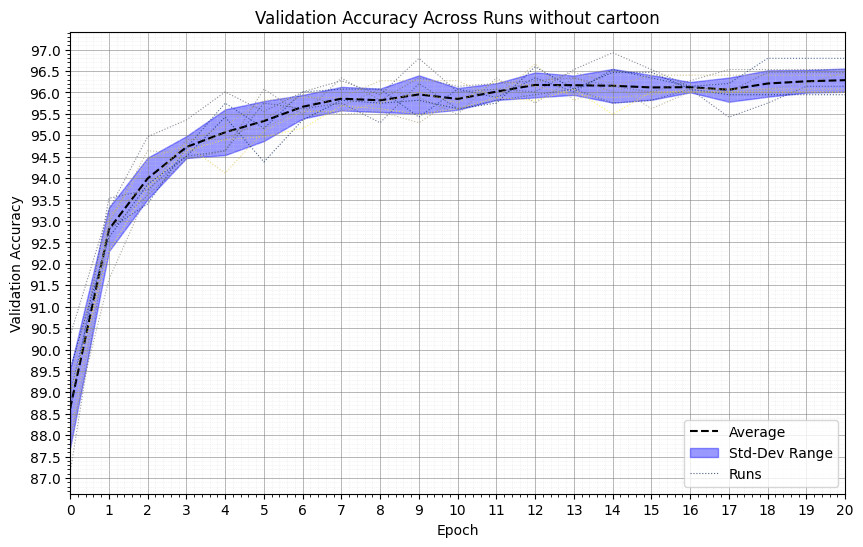

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/photo_val_accuracy_plot.png


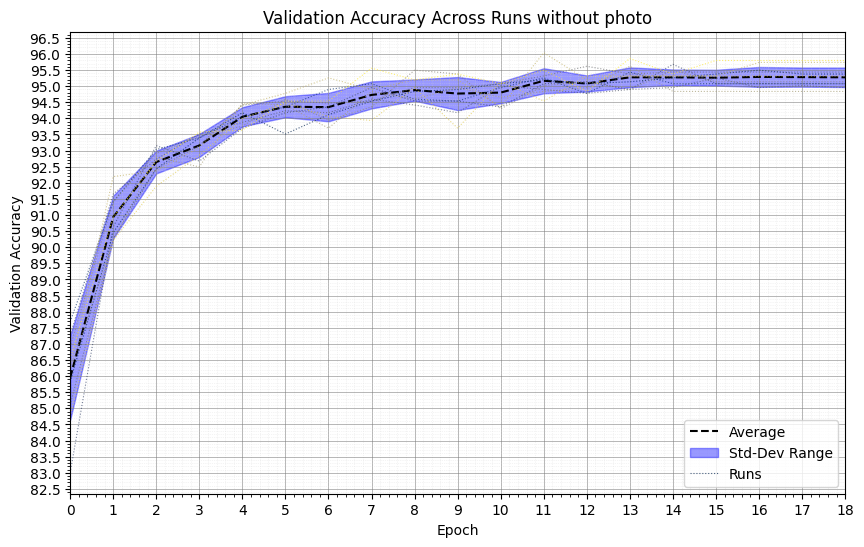

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs/sketch_val_accuracy_plot.png


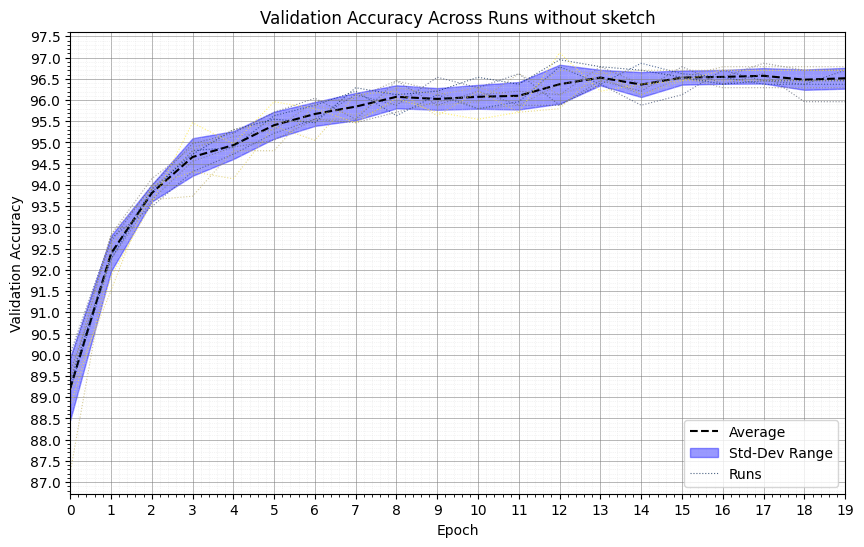

Plot saved at ../experiments/resnet34-pt-mixstyle-pacs//plots\global_val_accuracy_plot.png


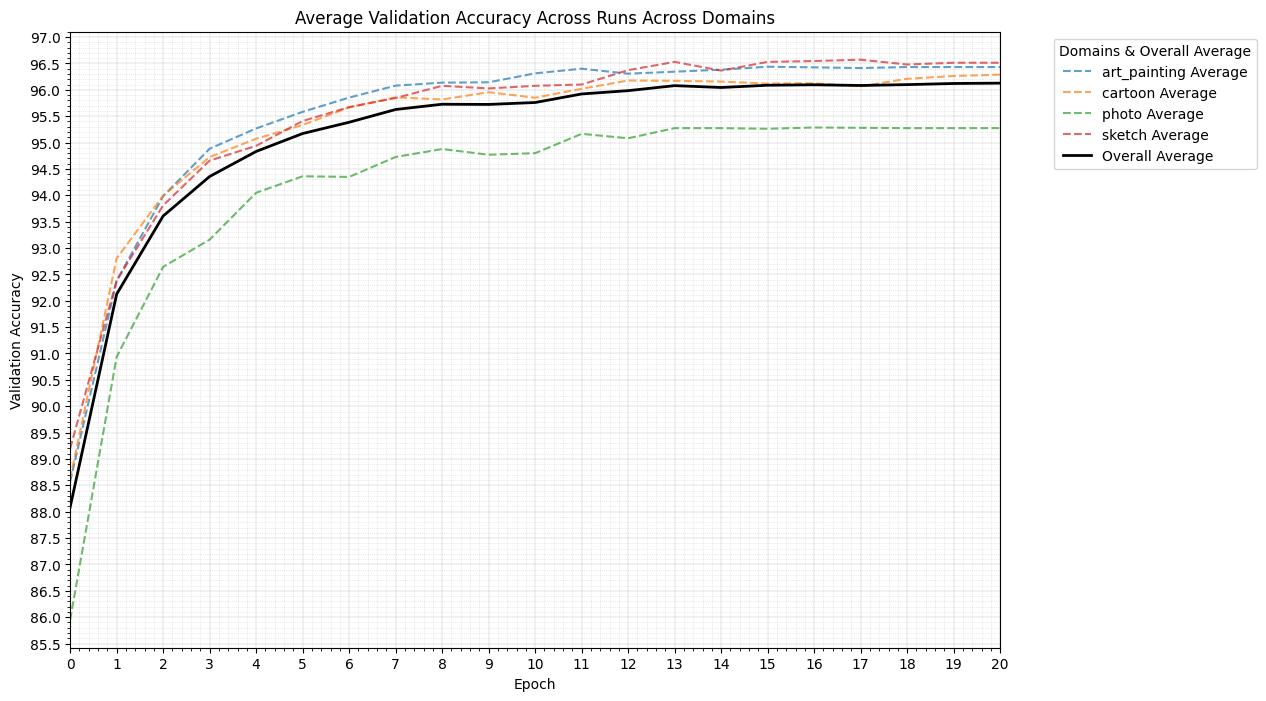

In [2]:
from domgen.eval import plot_accuracies, plot_training_curves

path = '../experiments/resnet34-pt-mixstyle-pacs/'
plot_accuracies(path, save=True, cmap='cividis') # use cividis or viridis to accommodate for colorblindness
plot_training_curves(path)

In [ ]:
from domgen.eval import plot_accuracies

path = '../experiments/Second/results.csv'
plot_accuracies(path, cmap='cividis') # use cividis or viridis to accommodate for colorblindness

### Visualizing Loss and Accuracy Curves Across All Runs

After each run, a `training_metrics.csv` file is saved in the runs directory. The `plot_training_curves`-function aggregates these files into a dataframe and generates a series of plots for each tracked metric.

The metrics are:
* training accuracy
* training loss
* validation accuracy
* validation loss

The plots display the average across all runs for each domain as a dotted line, as well as the margin, bordered by the min and max.
Additionally, for each metric the average across all domains is displayed in a separate plot.

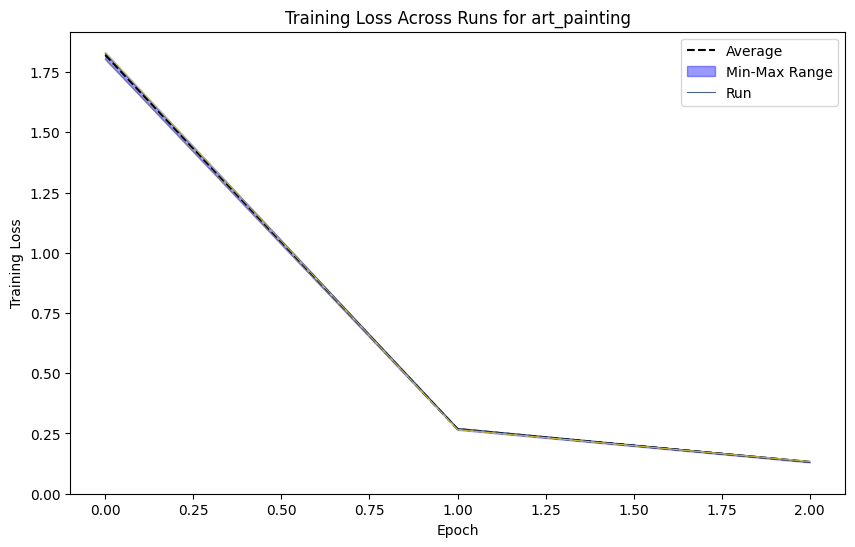

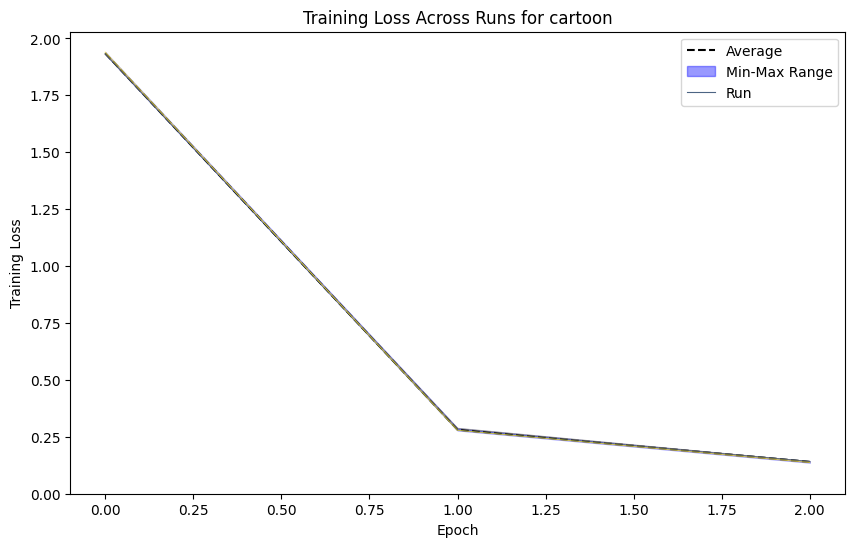

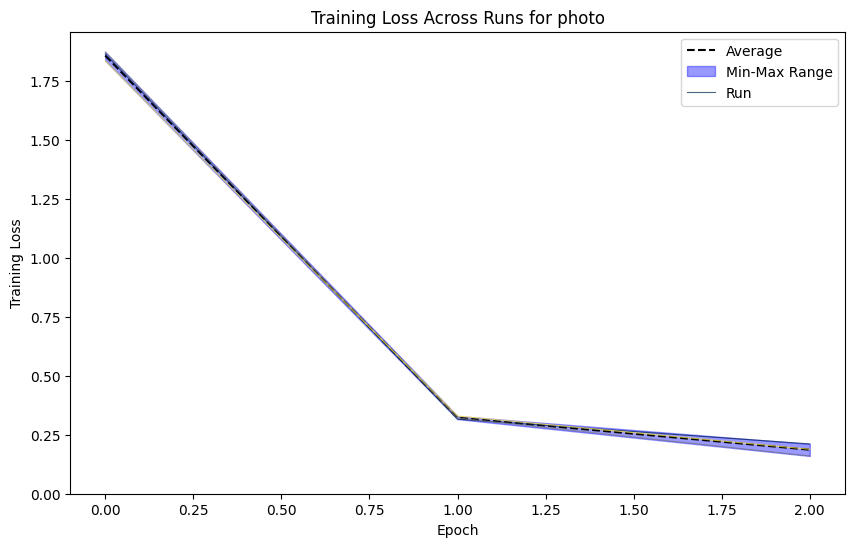

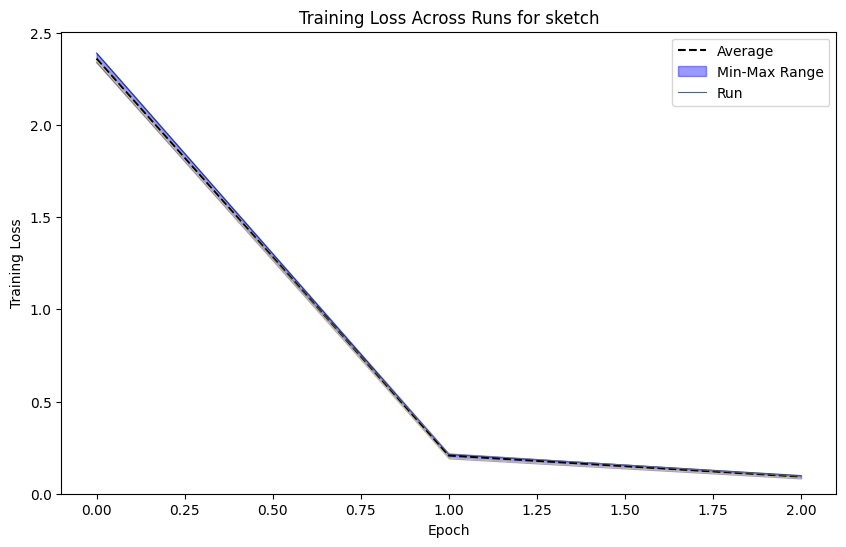

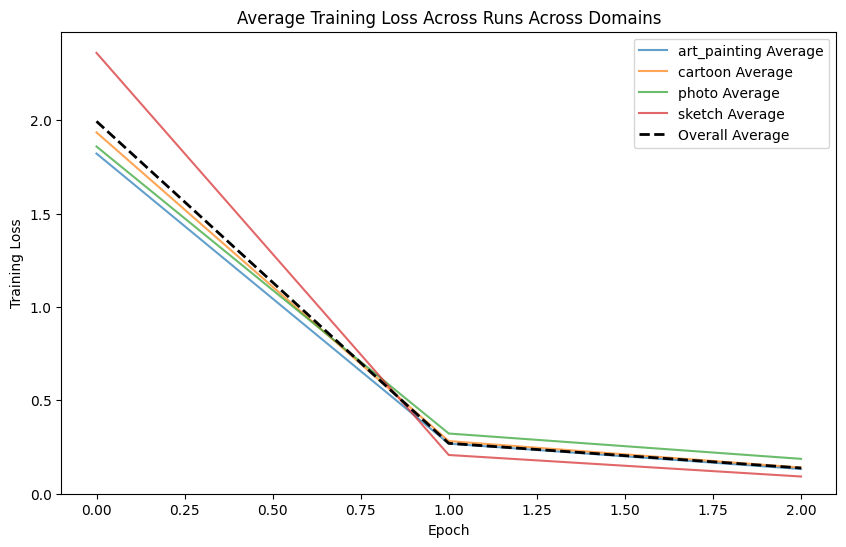

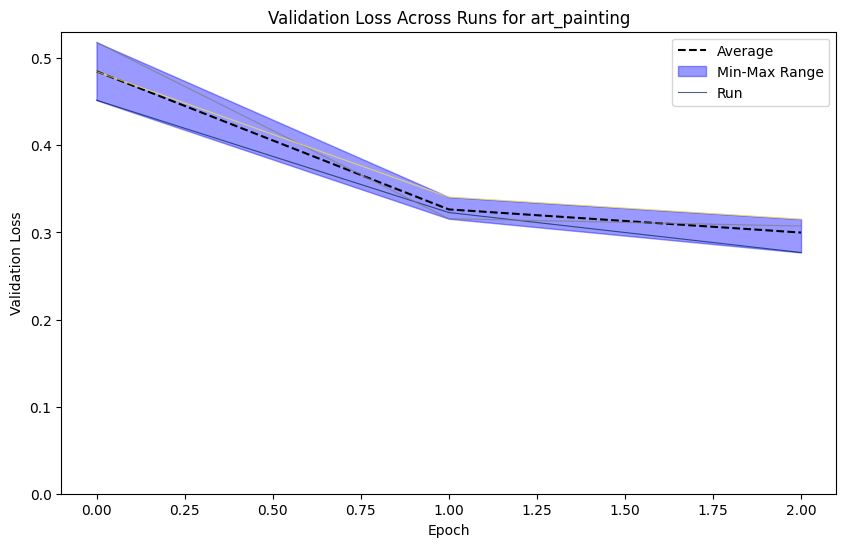

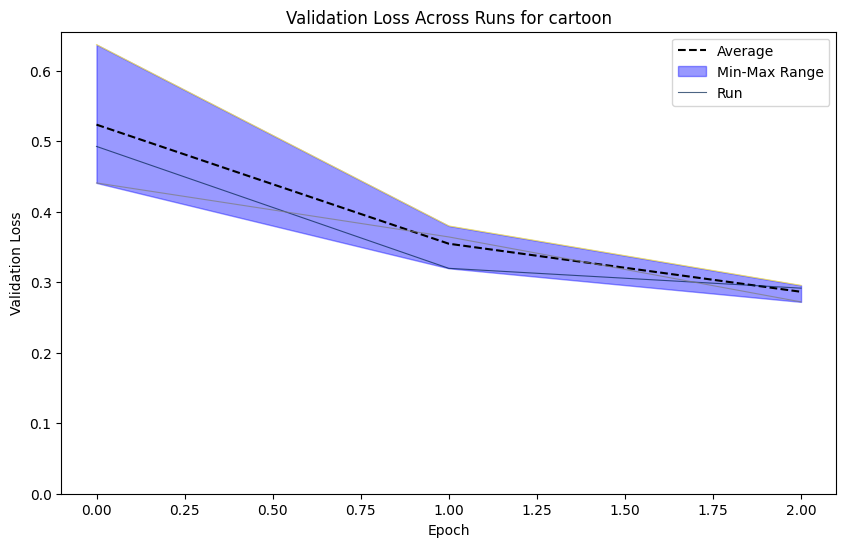

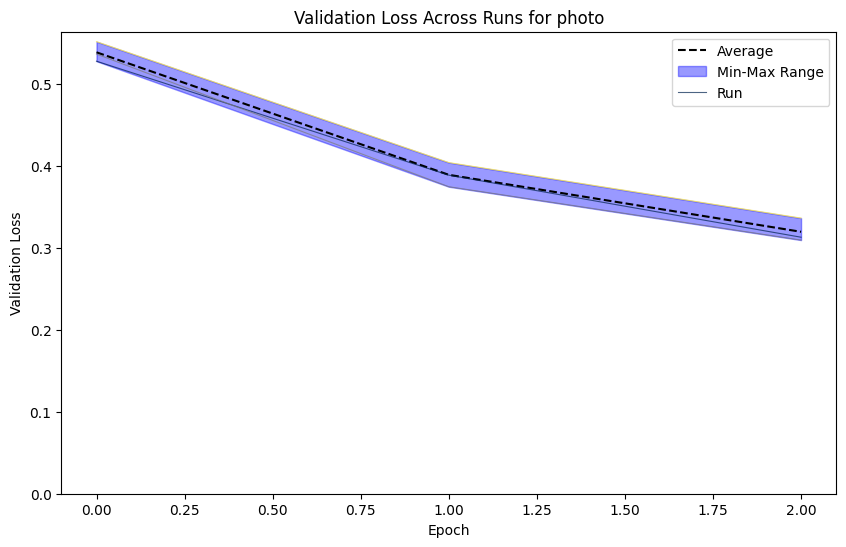

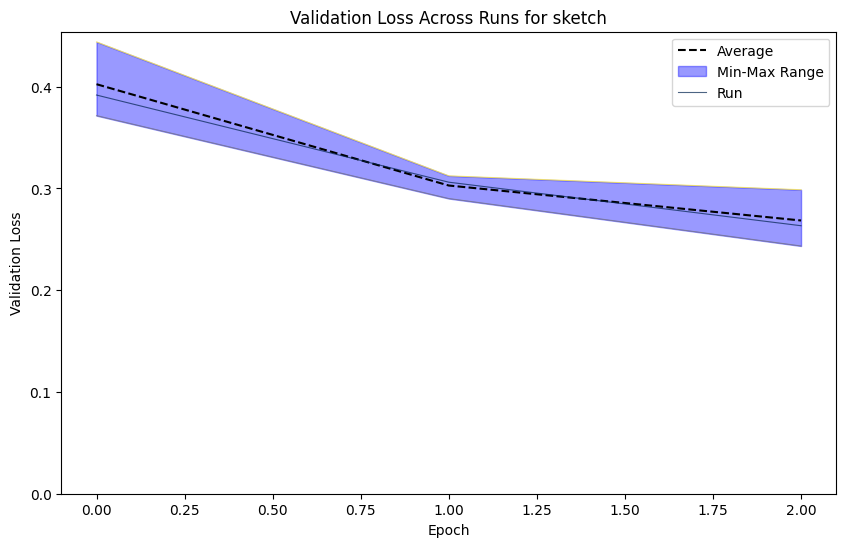

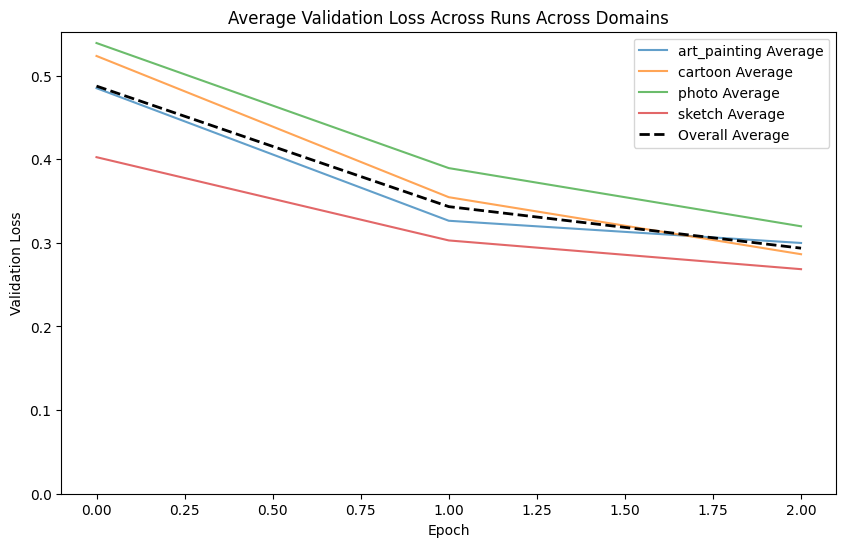

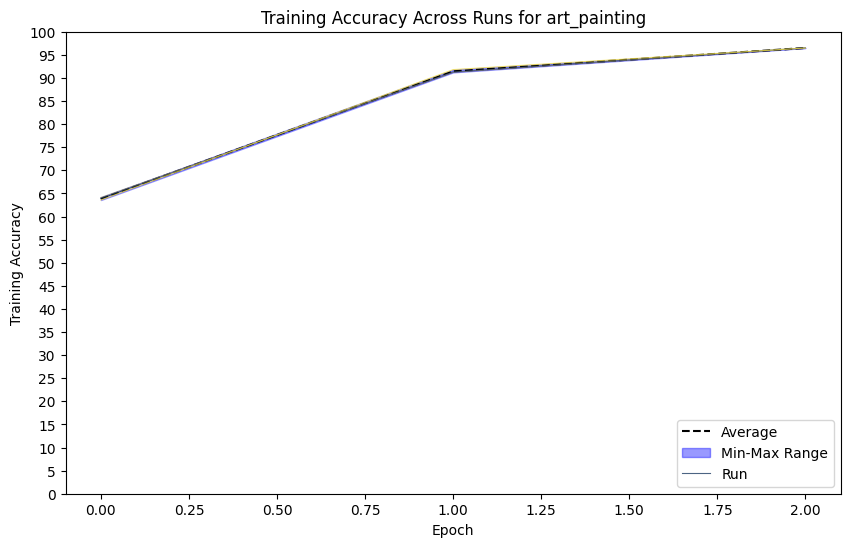

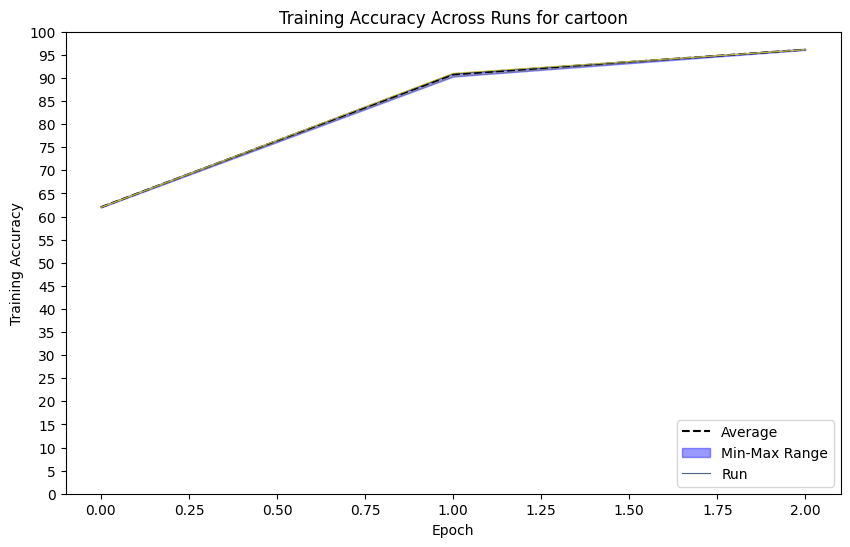

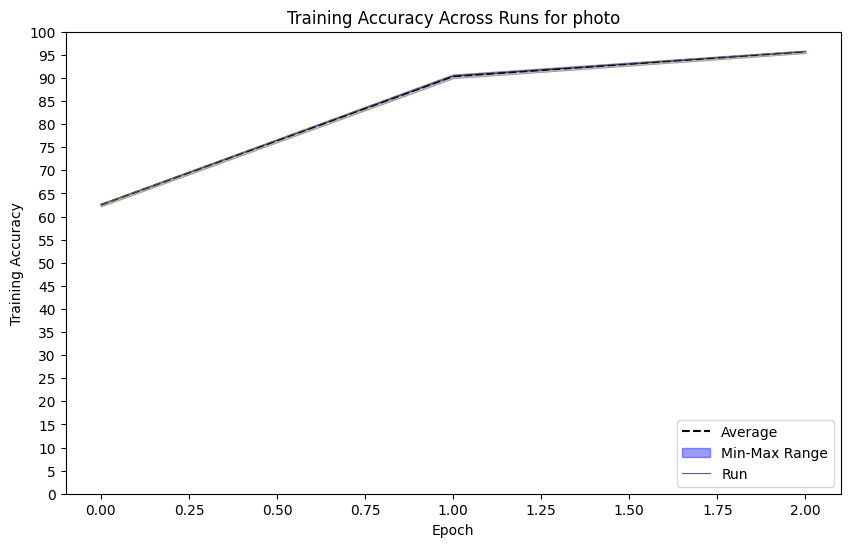

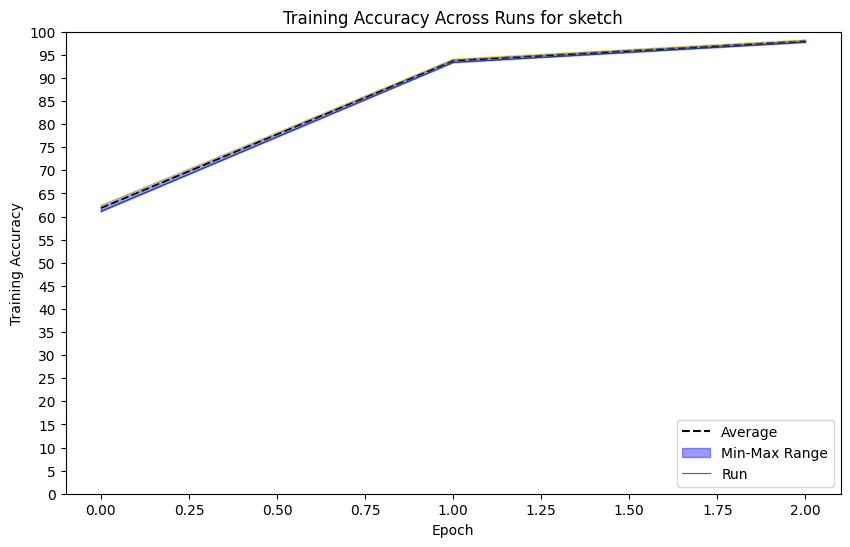

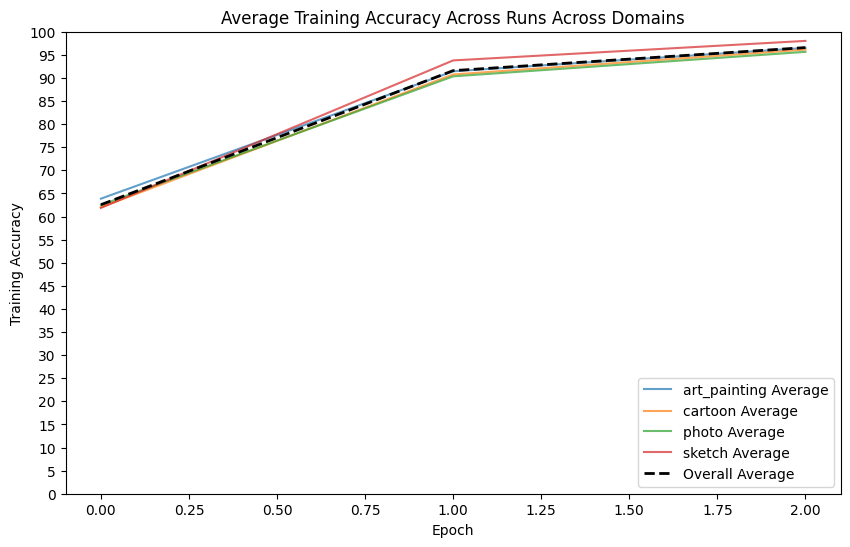

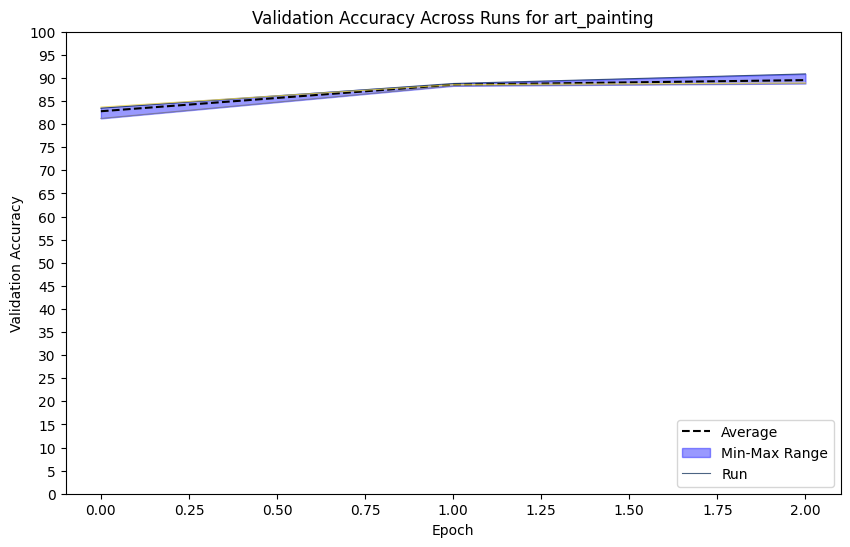

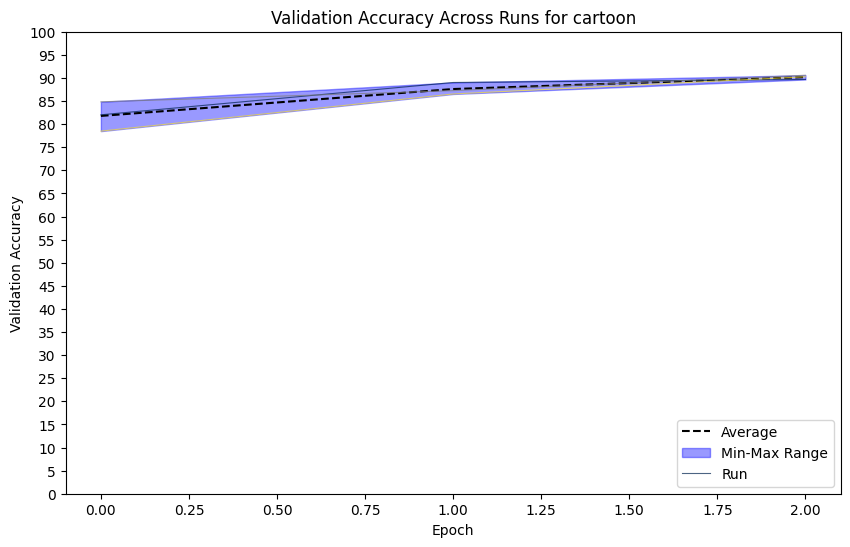

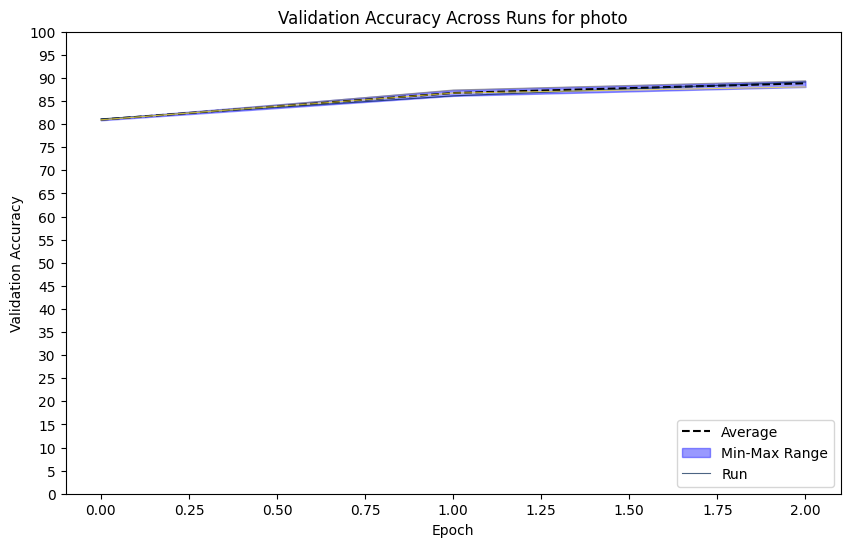

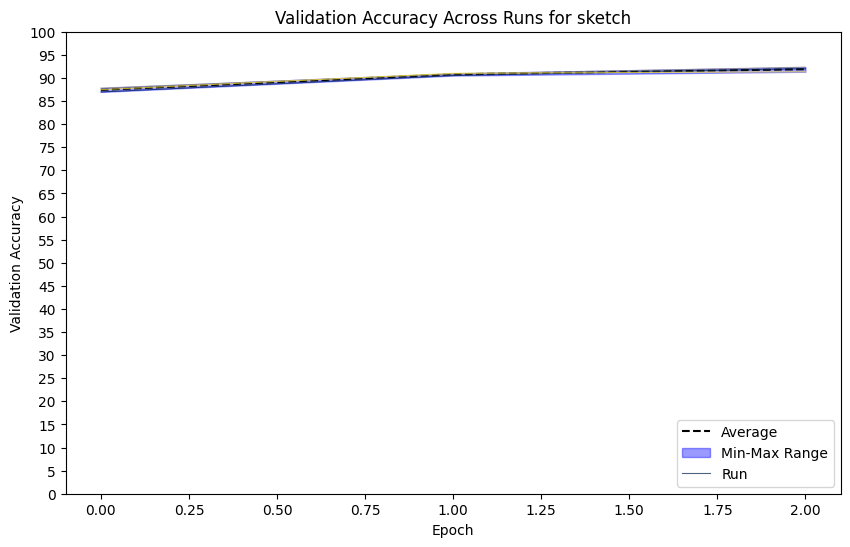

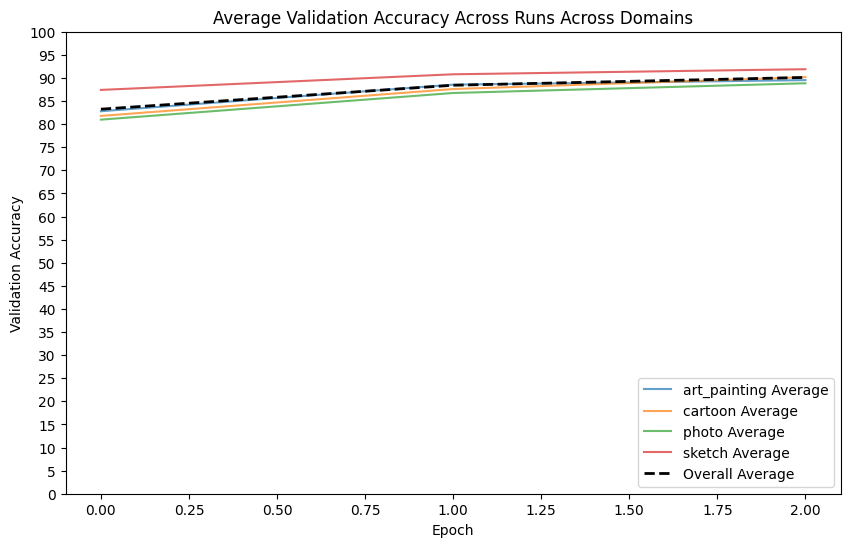

In [2]:
from domgen.eval import plot_training_curves

path2 = '../experiments/Second/'
data = plot_training_curves(path2)

### Visualizing the Results of the Hyperparameter Search

In the following, we use the `plot_hyperparameters` function to visualize the results from the hyperparameter search in form of parallel-coordinate plots.

In [5]:
import os
from domgen.eval import plot_hyperparameters, find_common_configs, load_results

trial_dir = "../experiments/trials/"
trials = [d for d in os.listdir(trial_dir) if os.path.isdir(os.path.join(trial_dir, d))]
fields = [
    'config/lr', 'config/batch_size', 'config/momentum', 'config/weight_decay',
    'config/optimizer', 'config/betas', 'config/eps',
    'config/nesterov', 'mean_accuracy'
]

densenet121 = [d for d in trials if d.startswith("densenet121-")]
densenet201 = [d for d in trials if d.startswith("densenet201-")]
resnet18 = [d for d in trials if d.startswith("resnet18-")]
resnet50 = [d for d in trials if d.startswith("resnet50-")]

densenet121_results = load_results(densenet121, trial_dir, fields)
densenet201_results = load_results(densenet201, trial_dir, fields)
resnet18_results = load_results(resnet18, trial_dir, fields)
resnet50_results = load_results(resnet50, trial_dir, fields)

Change the `MODEL` and `RESULTS` variables to the desired model to visualize the parcoords and potentially find common configs.

No common configurations found across all domains.


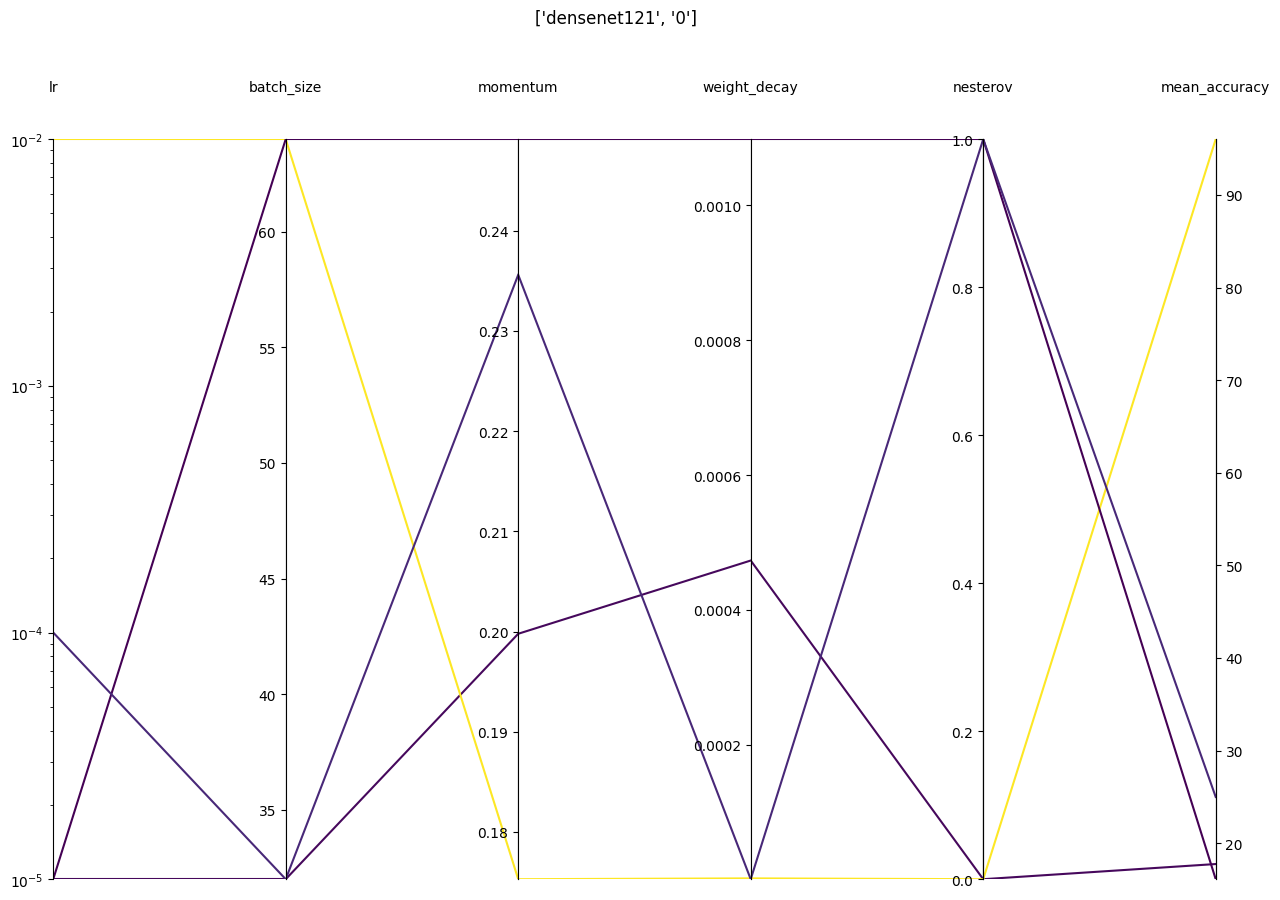

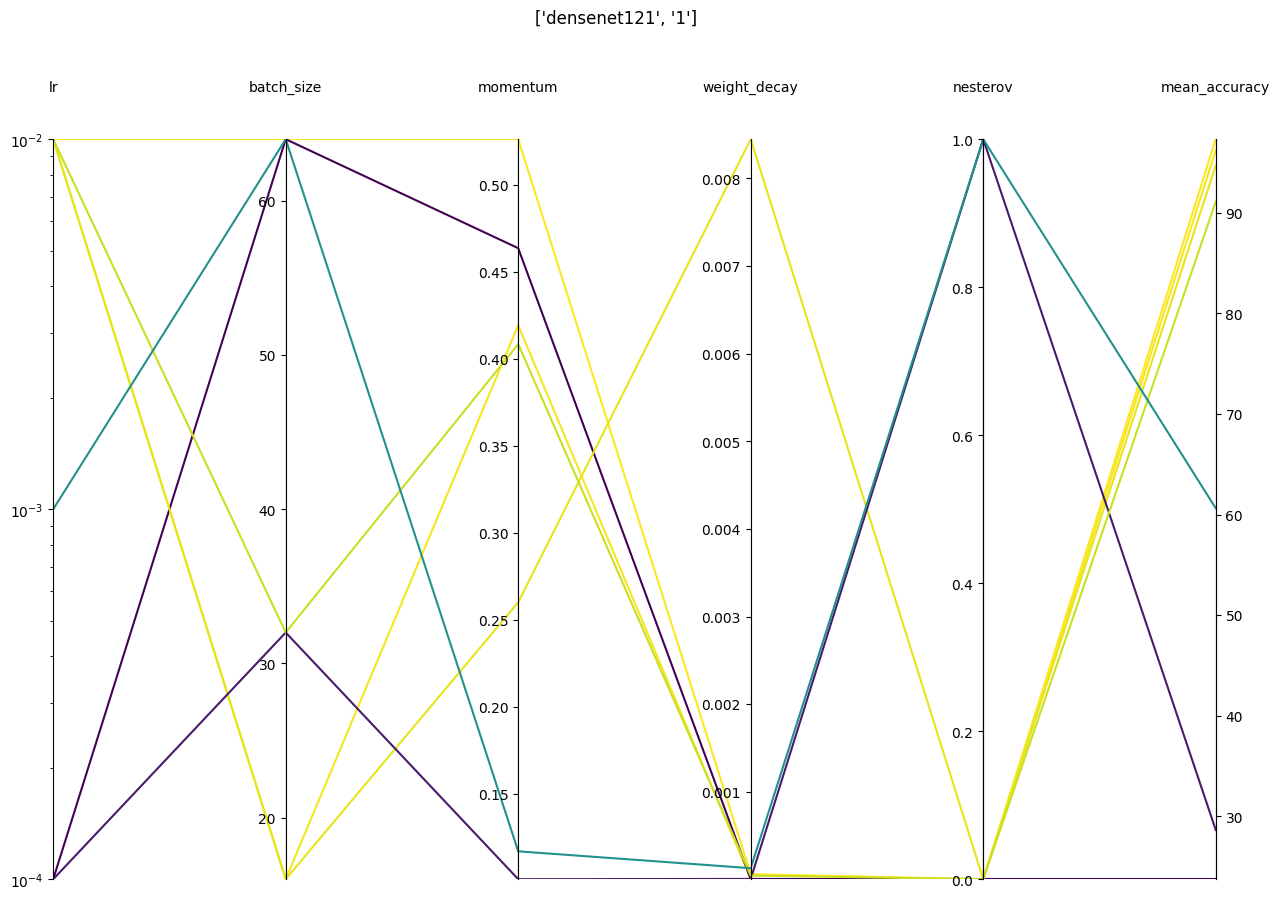

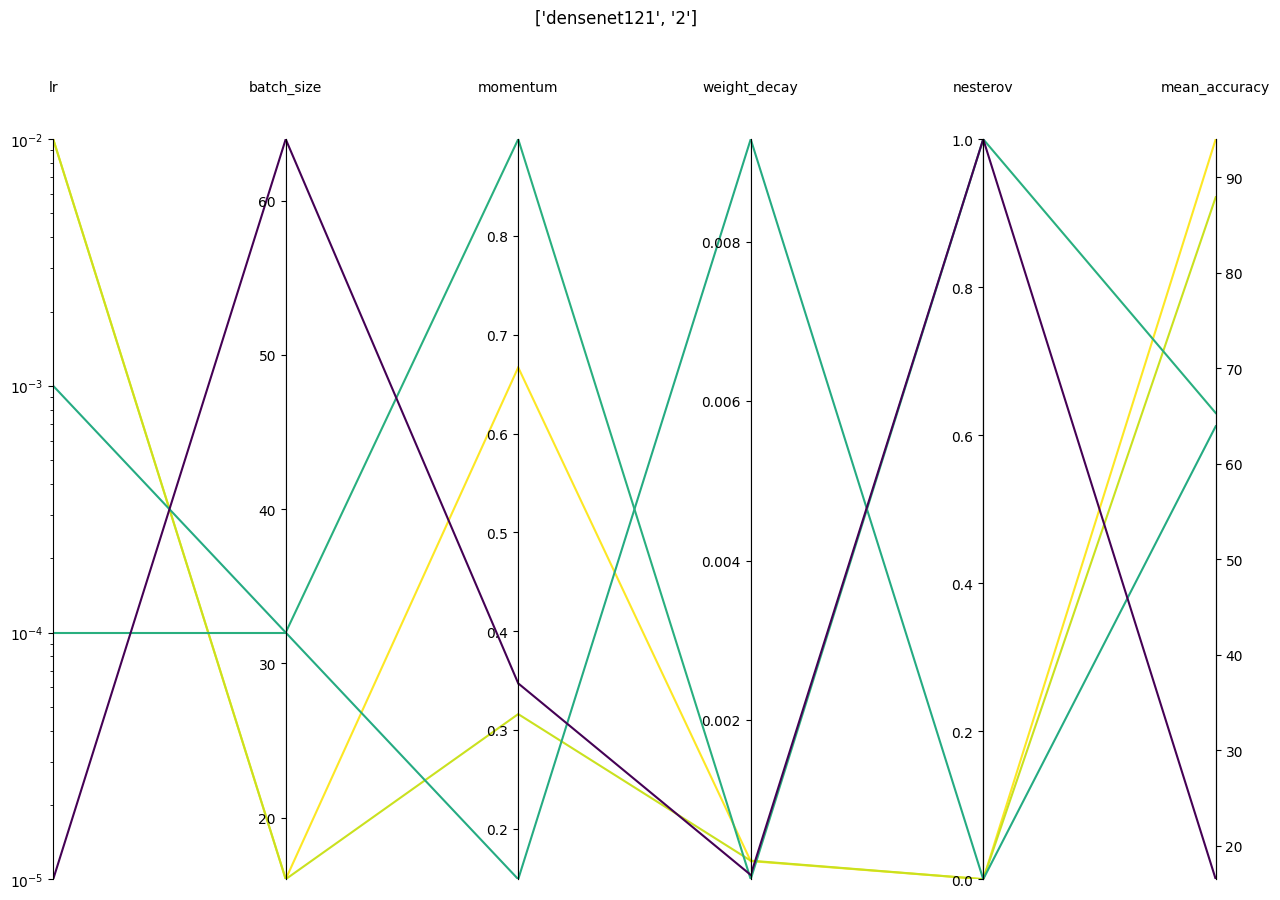

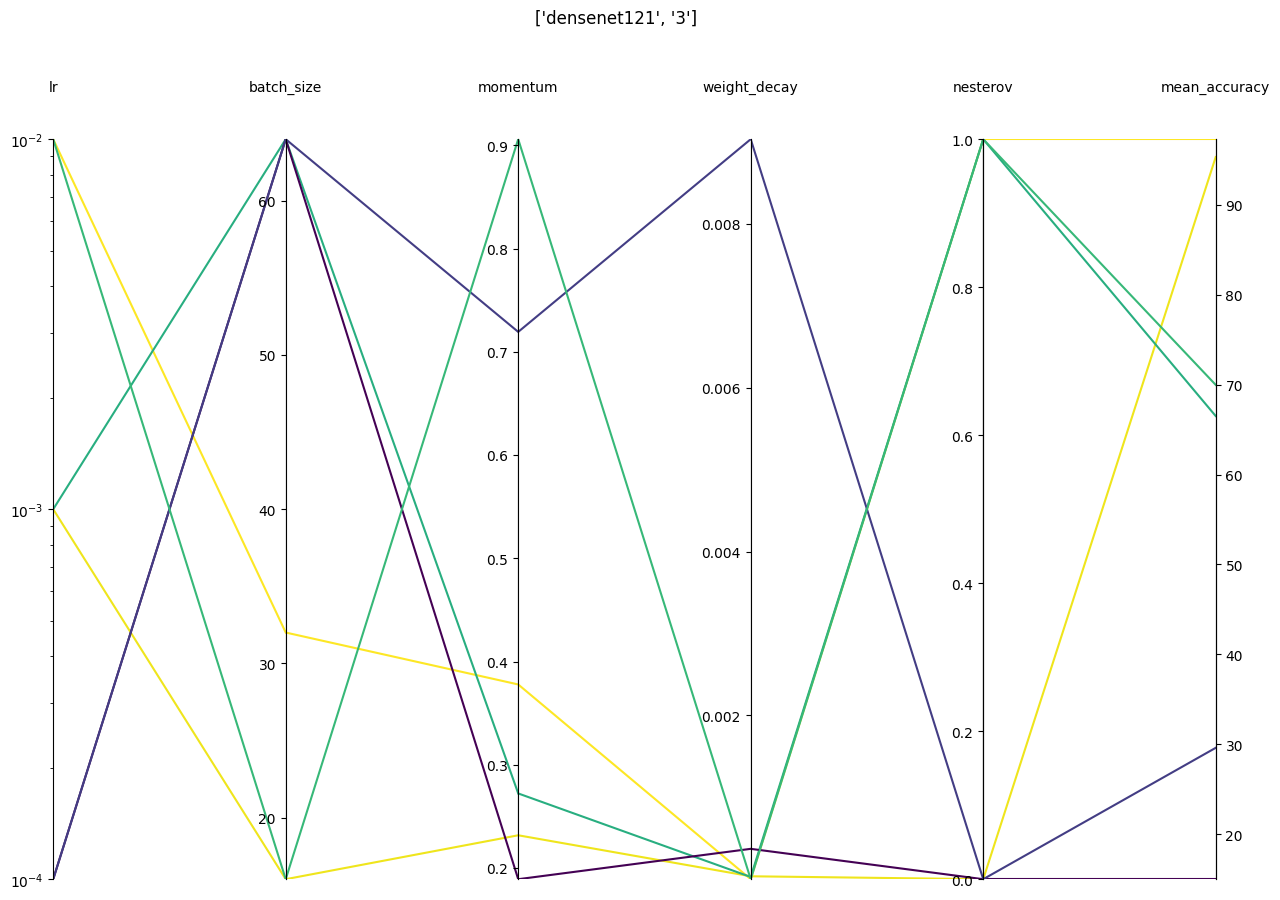

In [8]:
MODEL = densenet121
RESULTS = densenet121_results
FILTER_OPTIMIZER = 'sgd' # 'sgd', 'adam', 'adamw

common_configs = find_common_configs(RESULTS, filter_optim=FILTER_OPTIMIZER)
if common_configs:
    print(f"Common configurations across all domains:")
    for config in common_configs:
        print(config)
else:
    print("No common configurations found across all domains.")

for trial in MODEL:
    plot_hyperparameters(
        data = trial_dir + trial + '/results.csv', title=trial.split('-')[:-1], filter_optim=FILTER_OPTIMIZER,)

Looking at all the parameters for a model - domain combination might not be as helpful if there exists no common set. Looking at just the filtered params for one optimizer for one domain paints a little bit of a clearer picture. However, if we aggregate the results for one optimizer over all domains in the trial run, we can distinguish good hyperparameter configurations for that optimizer - model - dataset combination:

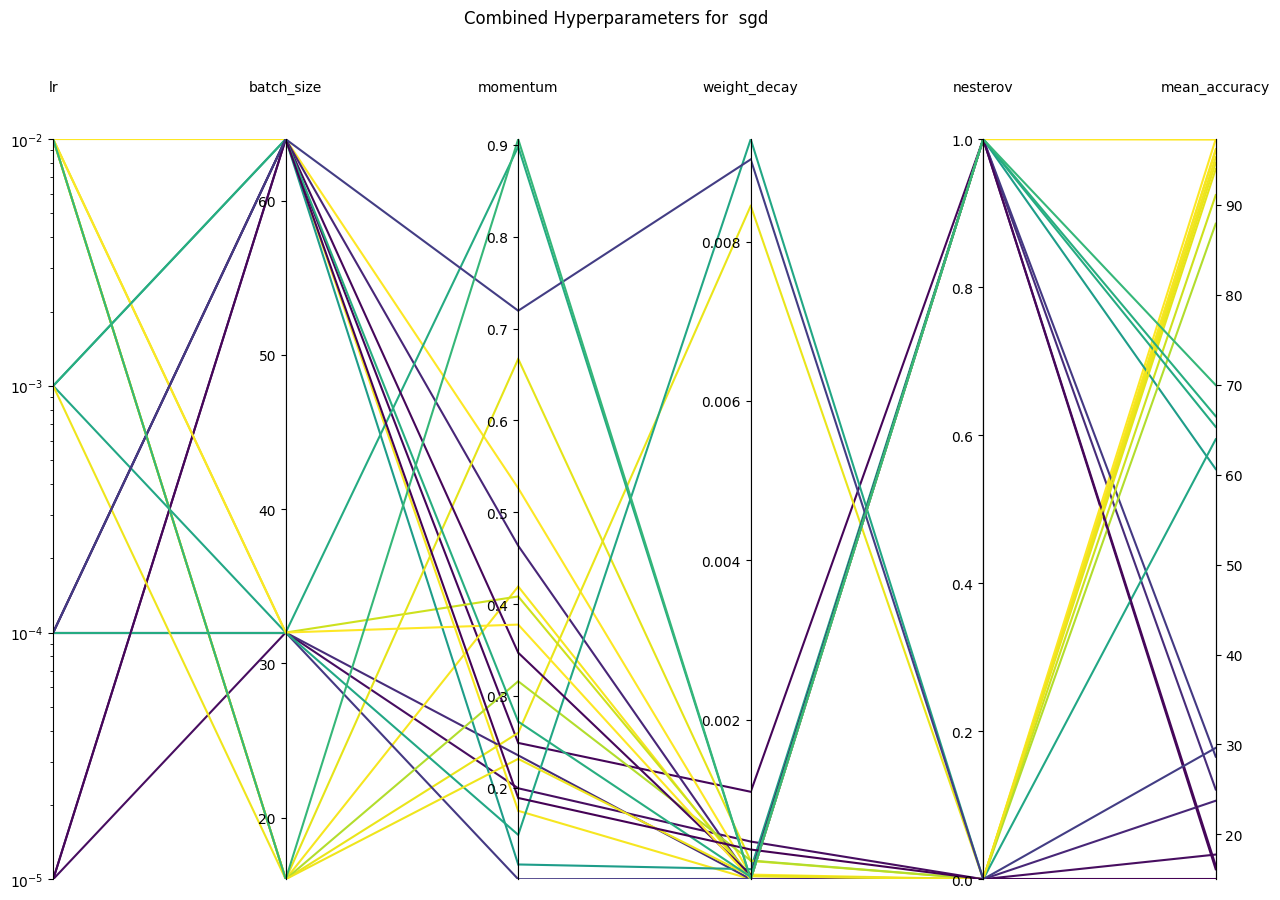

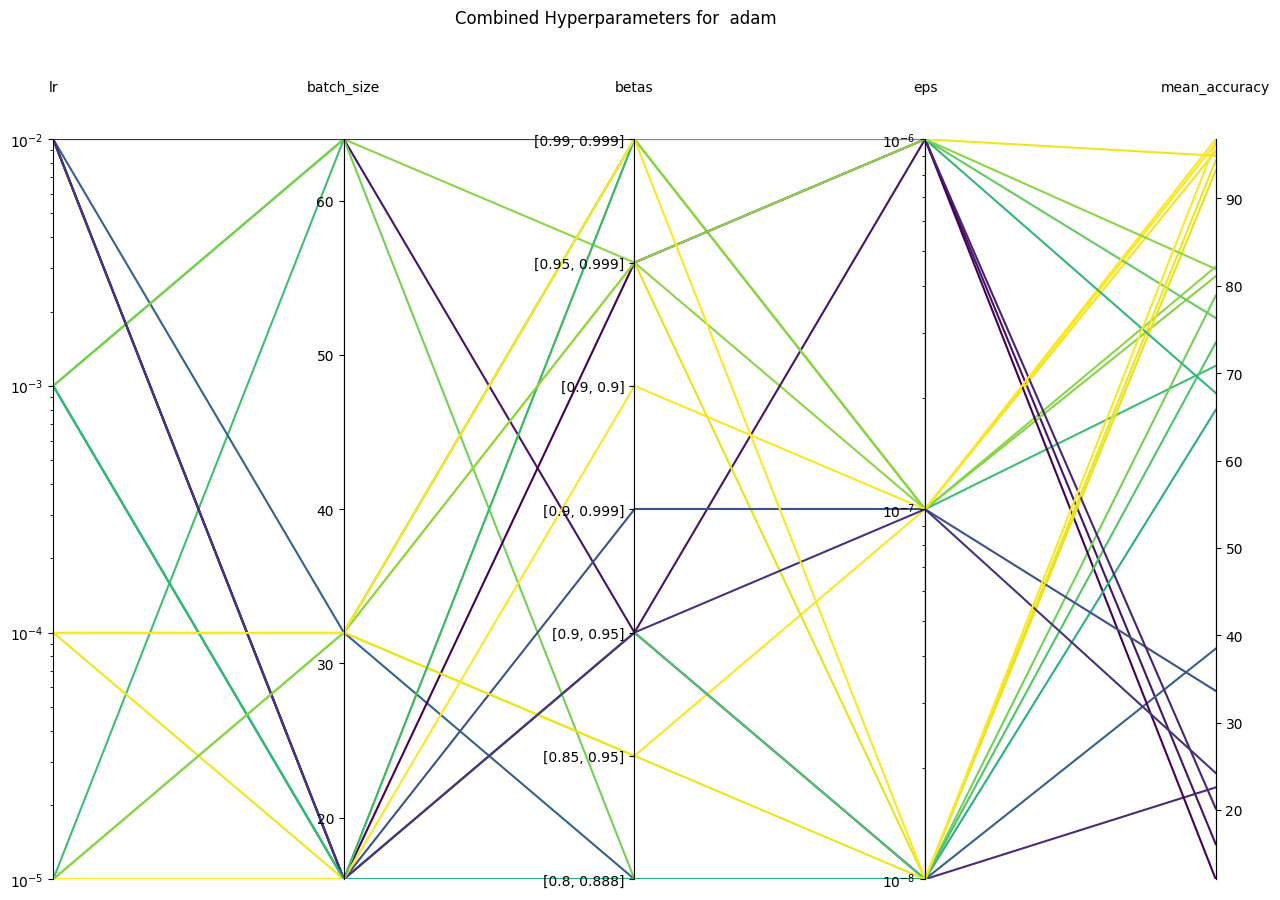

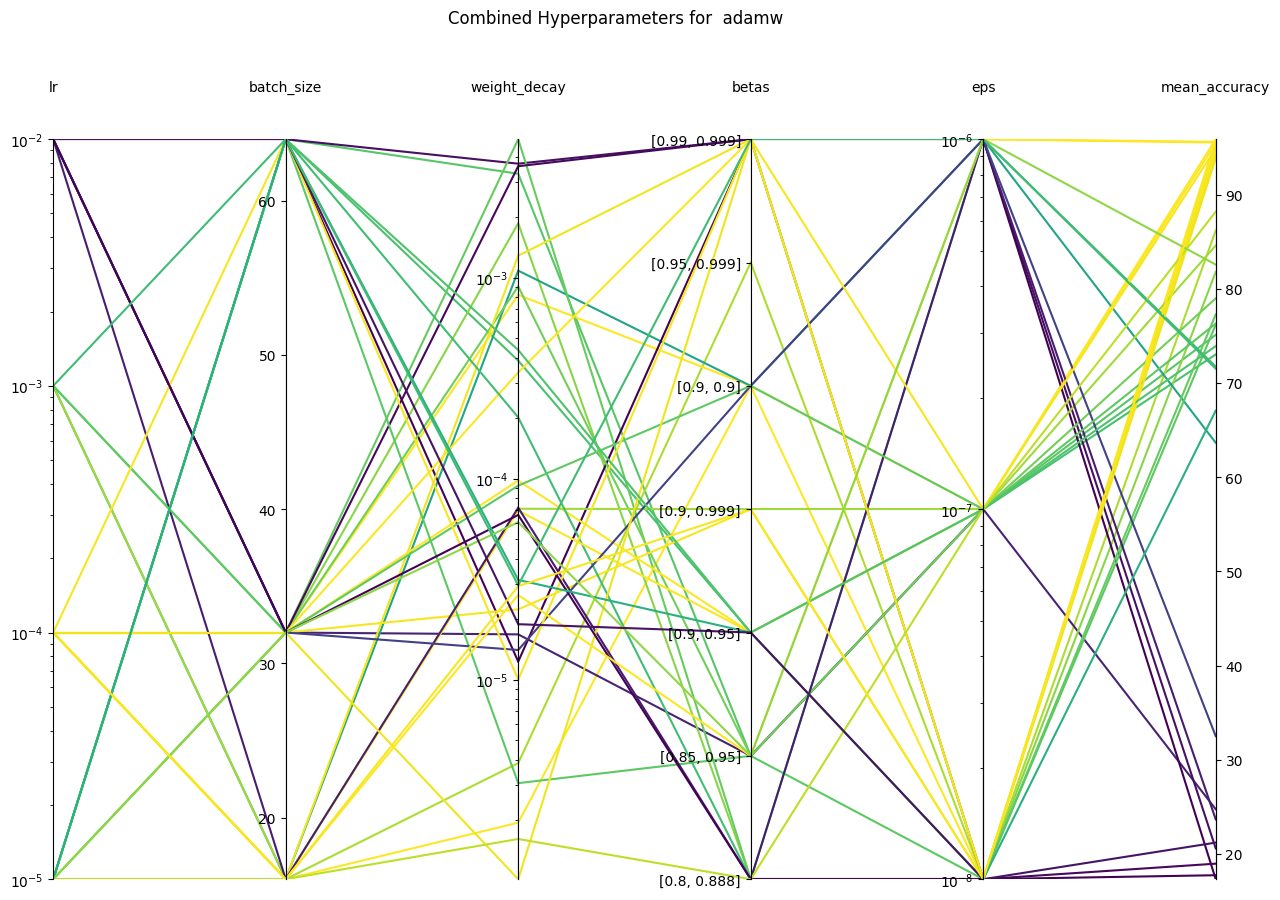

In [9]:
MODEL = densenet121_results
NAME = 'Combined Hyperparameters for '
OPTIMIZERS = ['sgd', 'adam', 'adamw']

for optimizer in OPTIMIZERS:
    plot_hyperparameters(MODEL, title=f'{NAME} {optimizer}', filter_optim=optimizer)